In [1]:
from google.colab import drive
drive.mount('/content/drive')


## imports

import pandas as pd
import numpy as np
import datetime

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOAD DATASET**

In [2]:
### Had divided the h5 into 3 csvs
targets = pd.read_csv('/content/drive/My Drive/Vayuh_assignment/dataset/targets.csv')
data_cov = pd.read_csv('/content/drive/My Drive/Vayuh_assignment/dataset/data_covariates.csv')
test_dates = pd.read_csv('/content/drive/My Drive/Vayuh_assignment/dataset/test_dates.csv')

######### Taking in the value to be predicted : tmp2m, and lat/ lon values
### 1. COMBINING TARGETS AND COVARIATES 
data_csv = pd.DataFrame(np.repeat(data_cov.values, 197, axis=0))
data_csv["lat"] = targets.iloc[:,0]
data_csv["lon"] = targets.iloc[:,1]
data_csv["tmp2m"] = targets.iloc[:,4]
data_csv.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,lat,lon,tmp2m
0,1990-01-01,-0.0475092,0.300221,-0.974385,-1.20968,-0.120953,-0.866703,-0.152826,-0.612332,-0.503529,-1.80801,-1.70342,-0.100201,0.466885,-0.66024,-1.33158,0.12,-0.635,3,1.70473,-0.3,0.2,-0,-0.4,27.25,261.75,19.084209
1,1990-01-01,-0.0475092,0.300221,-0.974385,-1.20968,-0.120953,-0.866703,-0.152826,-0.612332,-0.503529,-1.80801,-1.70342,-0.100201,0.466885,-0.66024,-1.33158,0.12,-0.635,3,1.70473,-0.3,0.2,-0,-0.4,27.25,277.75,21.040636
2,1990-01-01,-0.0475092,0.300221,-0.974385,-1.20968,-0.120953,-0.866703,-0.152826,-0.612332,-0.503529,-1.80801,-1.70342,-0.100201,0.466885,-0.66024,-1.33158,0.12,-0.635,3,1.70473,-0.3,0.2,-0,-0.4,27.25,279.75,21.462631
3,1990-01-01,-0.0475092,0.300221,-0.974385,-1.20968,-0.120953,-0.866703,-0.152826,-0.612332,-0.503529,-1.80801,-1.70342,-0.100201,0.466885,-0.66024,-1.33158,0.12,-0.635,3,1.70473,-0.3,0.2,-0,-0.4,29.25,259.75,15.714995
4,1990-01-01,-0.0475092,0.300221,-0.974385,-1.20968,-0.120953,-0.866703,-0.152826,-0.612332,-0.503529,-1.80801,-1.70342,-0.100201,0.466885,-0.66024,-1.33158,0.12,-0.635,3,1.70473,-0.3,0.2,-0,-0.4,29.25,261.75,16.400761


In [3]:
##### 2.  FIND COLUMNS WITH NAN VALUES 
is_NaN = data_csv.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data_csv[row_has_NaN]
print("ROWS",rows_with_NaN)
print("COLUMNS" , data_csv.columns[data_csv.isna().any()].tolist())


###  FILLING THE PREVIOUS VALUE : ONly last row had a missing value, filled it up
data_csv = data_csv.fillna(-0.5)

## convert date column to datetime format
data_csv.iloc[:,0] = pd.to_datetime(data_csv.iloc[:,0])
## delete unnamed column

data_csv.info()
data_csv.head()
data_csv.columns = [str(x) for x in data_csv.columns]


ROWS                   0        1         2         3  ...   23    lat     lon      tmp2m
2270425  2021-07-22  1.20879  0.189809  0.892057  ...  0.6  27.25  261.75  29.717882
2270426  2021-07-22  1.20879  0.189809  0.892057  ...  0.6  27.25  277.75  28.448486
2270427  2021-07-22  1.20879  0.189809  0.892057  ...  0.6  27.25  279.75  27.857403
2270428  2021-07-22  1.20879  0.189809  0.892057  ...  0.6  29.25  259.75  30.080191
2270429  2021-07-22  1.20879  0.189809  0.892057  ...  0.6  29.25  261.75  29.416460
...             ...      ...       ...       ...  ...  ...    ...     ...        ...
2270617  2021-07-22  1.20879  0.189809  0.892057  ...  0.6  47.25  265.75  21.917904
2270618  2021-07-22  1.20879  0.189809  0.892057  ...  0.6  47.25  267.75  20.158415
2270619  2021-07-22  1.20879  0.189809  0.892057  ...  0.6  47.25  269.75  20.005484
2270620  2021-07-22  1.20879  0.189809  0.892057  ...  0.6  47.25  271.75  20.822208
2270621  2021-07-22  1.20879  0.189809  0.892057  ...  0.6  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,lat,lon,tmp2m
0,1990-01-01,-0.047509,0.300221,-0.974385,-1.209676,-0.120953,-0.866703,-0.152826,-0.612332,-0.503529,-1.808013,-1.703418,-0.100201,0.466885,-0.66024,-1.331577,0.12,-0.635,3,1.70473,-0.3,0.2,-0.0,-0.4,27.25,261.75,19.084209
1,1990-01-01,-0.047509,0.300221,-0.974385,-1.209676,-0.120953,-0.866703,-0.152826,-0.612332,-0.503529,-1.808013,-1.703418,-0.100201,0.466885,-0.66024,-1.331577,0.12,-0.635,3,1.70473,-0.3,0.2,-0.0,-0.4,27.25,277.75,21.040636
2,1990-01-01,-0.047509,0.300221,-0.974385,-1.209676,-0.120953,-0.866703,-0.152826,-0.612332,-0.503529,-1.808013,-1.703418,-0.100201,0.466885,-0.66024,-1.331577,0.12,-0.635,3,1.70473,-0.3,0.2,-0.0,-0.4,27.25,279.75,21.462631
3,1990-01-01,-0.047509,0.300221,-0.974385,-1.209676,-0.120953,-0.866703,-0.152826,-0.612332,-0.503529,-1.808013,-1.703418,-0.100201,0.466885,-0.66024,-1.331577,0.12,-0.635,3,1.70473,-0.3,0.2,-0.0,-0.4,29.25,259.75,15.714995
4,1990-01-01,-0.047509,0.300221,-0.974385,-1.209676,-0.120953,-0.866703,-0.152826,-0.612332,-0.503529,-1.808013,-1.703418,-0.100201,0.466885,-0.66024,-1.331577,0.12,-0.635,3,1.70473,-0.3,0.2,-0.0,-0.4,29.25,261.75,16.400761


**EDA**

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


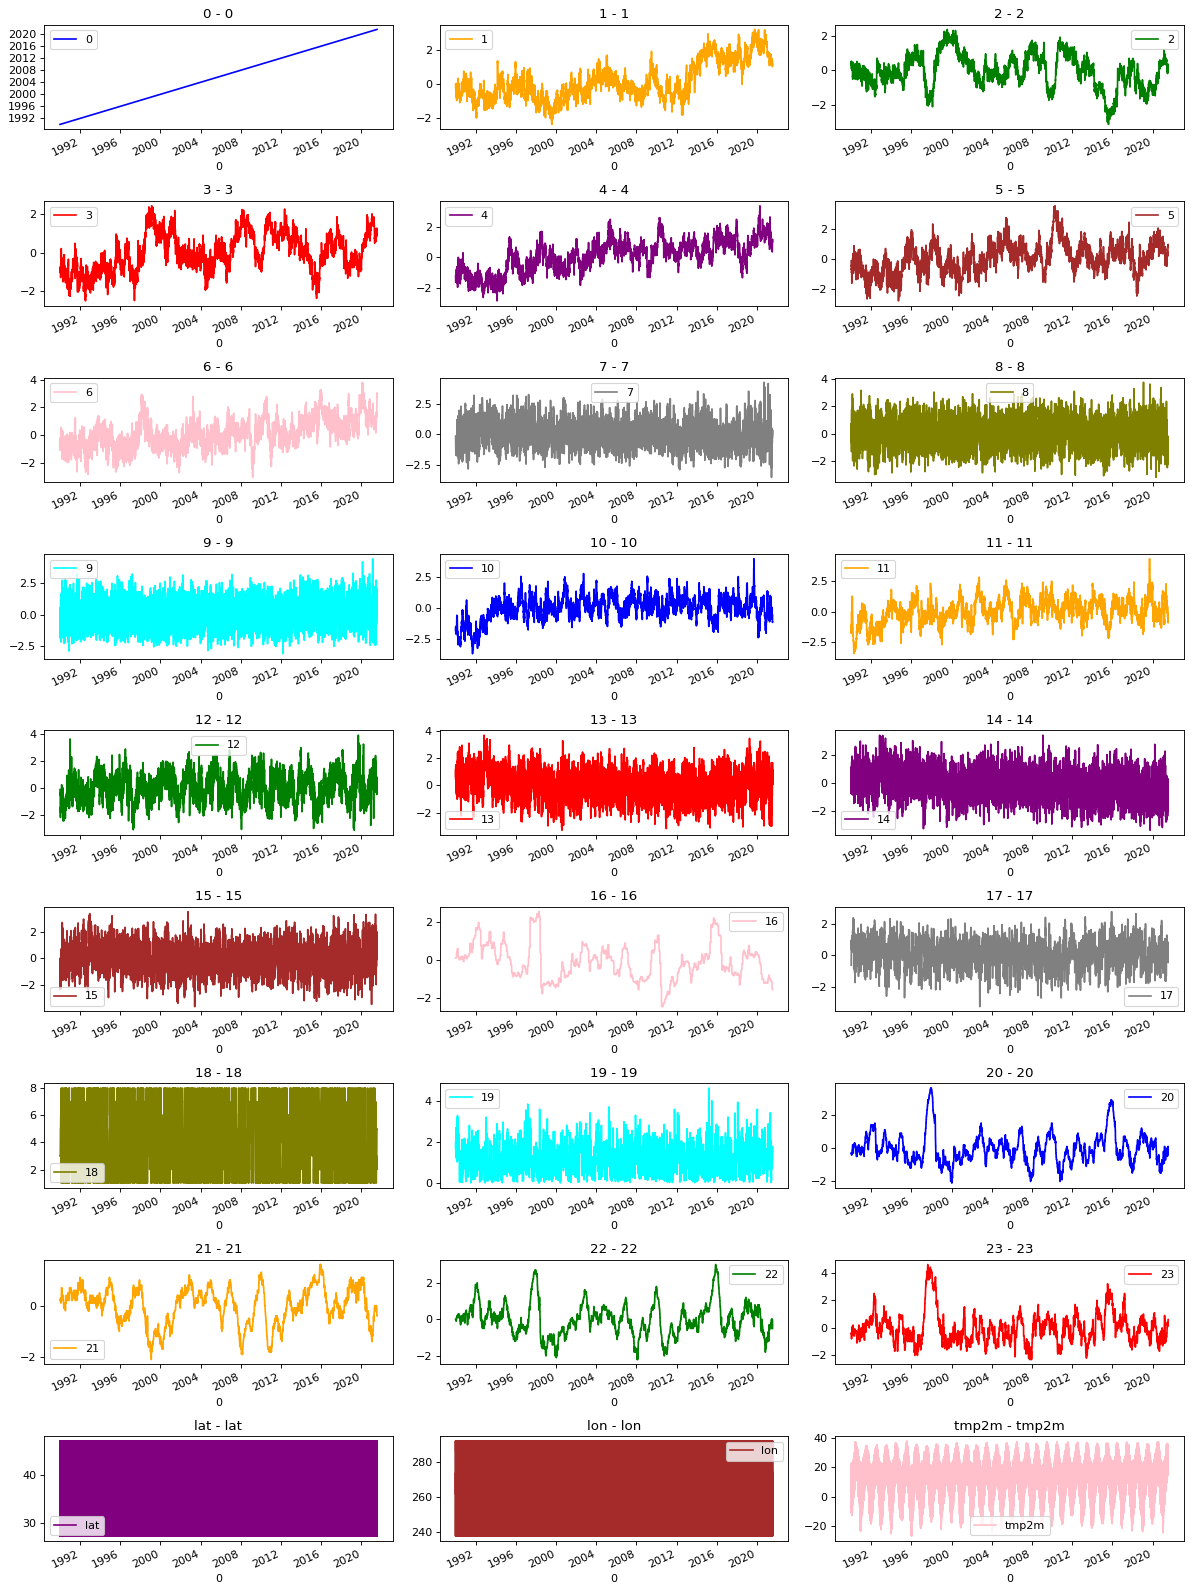

In [9]:
feature_keys = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'lat', 'lon', 'tmp2m']

colors = ["blue","orange","green","red","purple","brown","pink","gray",
        "olive","cyan","blue","orange","green","red","purple","brown",
        "pink","gray","olive","cyan","blue","orange","green","red","purple",
        "brown","pink","gray","olive","cyan"
        ]


date_time_key = '0'


time_data = data_csv['0']
fig, axes = plt.subplots(
    nrows=9, ncols=3, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
)
for i in range(len(feature_keys)):
    key = feature_keys[i]
    c = colors[i % (len(colors))]
    t_data = data_csv.loc[:,key]
    t_data.index = time_data
    t_data.head()
    ax = t_data.plot(
        ax=axes[i // 3, i % 3],
        color=c,
        title="{} - {}".format(feature_keys[i], key),
        rot=25,
    )
    ax.legend([feature_keys[i]])
plt.tight_layout()


**TRAIN -TEST SPLIT**

In [5]:
data_csv.head()


In [10]:
#### 3. EXTRACT DATA : FOR TRAINING DATASET : 2004 - 2019

#1. Extracting 15 Years' data
#2. Sorting up values based on LAt/Lon so 15 yrs data of area1 , will be followed by 15yrs' data of subsequent areas 


########################################################

start_date = pd.to_datetime('20040706')
end_date = pd.to_datetime('20190701')
data_csv.iloc[:,0] = pd.to_datetime(data_csv.iloc[:,0])

df_15Yrs = data_csv.loc[(data_csv['0'] >= start_date) & (data_csv['0'] <= end_date)]
print(df_15Yrs.head())

### SORT BASED ON LAT/LON
df_sorted = df_15Yrs.sort_values(by = ['lat', 'lon'], ascending = [True, True])
df_sorted.to_csv('/content/drive/My Drive/Vayuh_assignment/dataset/dataset_training_15Yr.csv')

                 0         1         2         3  ...   23    lat     lon      tmp2m
1044100 2004-07-06  0.285847 -0.227877 -0.966594  ... -1.3  27.25  261.75  29.814835
1044101 2004-07-06  0.285847 -0.227877 -0.966594  ... -1.3  27.25  277.75  27.525846
1044102 2004-07-06  0.285847 -0.227877 -0.966594  ... -1.3  27.25  279.75  27.141323
1044103 2004-07-06  0.285847 -0.227877 -0.966594  ... -1.3  29.25  259.75  29.773315
1044104 2004-07-06  0.285847 -0.227877 -0.966594  ... -1.3  29.25  261.75  28.770670

[5 rows x 27 columns]


In [11]:
#### 3. EXTRACT DATA : FOR TEST DATASET : 2019 - 2021

#1. Extracting 3 Years' data : These 3 Years include the test set dates, THEY ARE SEPERATED UP FROM TRAINING DATA
#2. Sorting up values based on LAt/Lon so 3 yrs data of area1 , will be followed by 3yrs' data of subsequent areas 


########################################################

start_date = pd.to_datetime('20190701')
end_date = pd.to_datetime('20210701')
df_3Yrs = data_csv.loc[(data_csv['0'] >= start_date) & (data_csv['0'] <= end_date)]
print(df_3Yrs.head())

### SORT BASED ON LAT/LON
df_sorted = df_3Yrs.sort_values(by = ['lat', 'lon'], ascending = [True, True])
df_sorted.to_csv('/content/drive/My Drive/Vayuh_assignment/dataset/dataset_test_3Yr.csv')

                 0         1        2         3  ...   23    lat     lon      tmp2m
2122281 2019-07-01  2.573991 -1.57745 -0.592047  ... -0.4  27.25  261.75  30.366022
2122282 2019-07-01  2.573991 -1.57745 -0.592047  ... -0.4  27.25  277.75  27.922287
2122283 2019-07-01  2.573991 -1.57745 -0.592047  ... -0.4  27.25  279.75  27.916164
2122284 2019-07-01  2.573991 -1.57745 -0.592047  ... -0.4  29.25  259.75  30.529493
2122285 2019-07-01  2.573991 -1.57745 -0.592047  ... -0.4  29.25  261.75  29.439356

[5 rows x 27 columns]
